In [11]:
## Support Vector Machine 
import numpy as np

x_train = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]]).reshape(6,2)
y_train = np.array([-1, 1, 1, -1, 1, -1]).reshape(6,1)



train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(6,1)
train_f2 = train_f2.reshape(6,1)

w1 = np.ones((6,1))
w2 = np.ones((6,1))

w1_arr = []
w2_arr = []

epochs = 1
alpha = 0.0001
epochs_total = 1000

while(epochs < epochs_total):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs, end = "\r")
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs_total * w1)
            w2 = w2 - alpha * (2 * 1/epochs_total * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs_total * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs_total * w2)
        count += 1
    epochs += 1
    w1_arr.append(w1.mean())
    w2_arr.append(w2.mean())
print(len(w1_arr))

999


In [12]:
print(len(w1_arr))

999


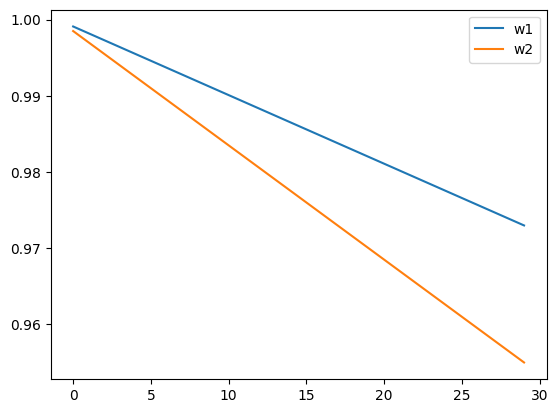

Final w1:  0.22912042235309718
Final w2:  -0.15355591072731103


In [13]:
import matplotlib.pyplot as plt

plt.plot(w1_arr[:30], label= "w1")
plt.plot(w2_arr[:30], label = "w2")
plt.legend()
plt.show()

print("Final w1: ", w1.mean())
print("Final w2: ", w2.mean())

Number of frames:  999


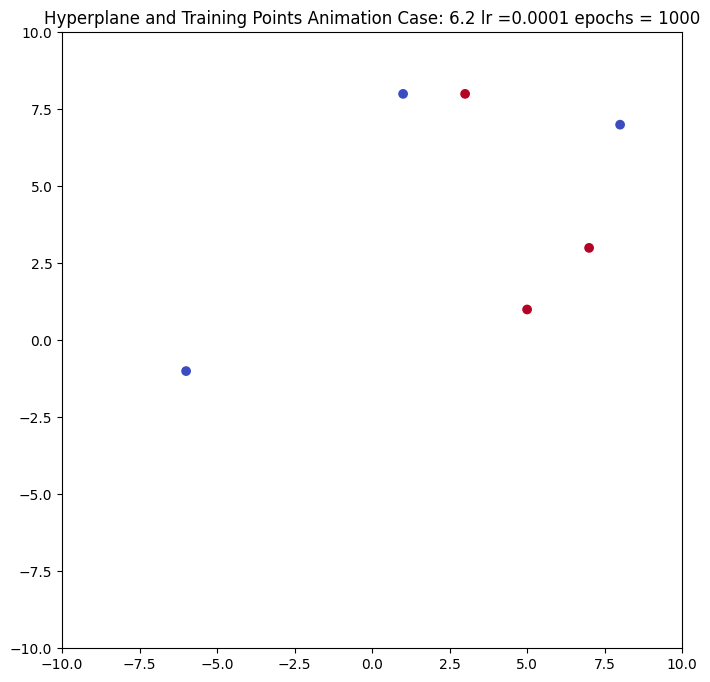

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate mock data (replace this with your actual data)
weights_history =  [(w1_arr[i], w2_arr[i]) for i in range(len(w1_arr))]
bias_history = [0 for i in range(len(w1_arr))]

num_frames = len(weights_history)

print("Number of frames: ", num_frames)


# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)


x_train = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
y_train = np.array([-1, 1, 1, -1, 1, -1])

points = x_train
labels = y_train
case=6.2
lr=0.0001

# Initialize scatter plot for points
scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm')

# Initialize line for hyperplane
line, = ax.plot([], [], 'g-', lw=2)

# Text for displaying current frame
frame_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

def init():
    return scatter, line, frame_text

def update(frame):
    # Update hyperplane
    print(frame, end='\r')
    w1, w2 = weights_history[frame]
    b = bias_history[frame]
    
    x = np.array([-10, 10])
    y = (-w1 * x - b) / w2
    
    line.set_data(x, y)
    
    # Update frame text
    frame_text.set_text(f'Frame: {frame}')
    
    return scatter, line, frame_text

# Create animation
anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

plt.title("Hyperplane and Training Points Animation Case: "+ str(case) + " lr =" + str(lr) + " epochs = " + str(epochs))
plt.show()

# Uncomment the following line to save the animation as a gif
title = "hyperplane_animation Case: " + str(case)  + "lr =" + str(lr) + " epochs = " + str(epochs) + ".mp4"
anim.save(title, writer='ffmpeg', fps=30)